# fit a exp curve with an edge - CMC system

In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [94]:
# the data
# x and y can be any measured property that shows the "2 lines intercepting" behavior
tab=np.array([
[100,57.9],
[200,54.3],
[500,52.7],
[1000,50.3],
[5000,41.8],
[10000,40.3],
[20000,38.8],
[30000,38.4],
[40000,37.8],
])

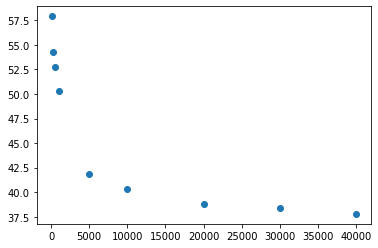

In [95]:
# plot
fig, ax = plt.subplots(1,1)
x1=tab[:,0]
y1=tab[:,1]
ax.scatter(x1,y1)
plt.show()

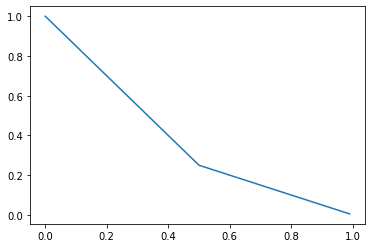

In [96]:
# The fitting equation
def g(x,d,csi,xmax,xmin): #regularization function
    return .5 + .5*(x-d)/(np.sqrt( ((x-d)**2) + ((xmax-xmin)**2)*(csi**2) ))

def fy(x,a,b,c,d,csi,xmax,xmin):
    return (a*x + b) * (1-g(x,d,csi,xmax,xmin)) + (g(x,d,csi,xmax,xmin)) * (c*(x-d) + (a*d + b))
#this is the explicit "2 lines" form, which uses g twice,
#one for turn off the first line and one for turn on the second line
#this is equivalent through algebraic manipulaion to a more compact form, but with lesse clear terms distinction

ytest= lambda x: fy(x,-1.5,1,-.5,.5,1e-8,1,0) #TEST PARAMETERS TO SEE SHAPE
# gtest= lambda x: g(x,.5,1e-8,1,0)
vx=np.arange(0,1,.01)
# xsc=np.arange(0,1,.2)
plt.plot(vx,ytest(vx))
# plt.plot(x,gtest(x))
# plt.scatter(xsc,ytest(xsc))
plt.show()

In [102]:
# known parameters

#numerical method tuning
csi=1e-5

#when x = 0, y = =70 APROX ass seen in plot
b = 70

#guesses
a = -70/4000 #guess by rough slope looking at exp plot
c = -70/200000 #guess by rough slope looking at exp plot
d = 2000 #initial guesss for interception
xmax = 100000
xmin = 0

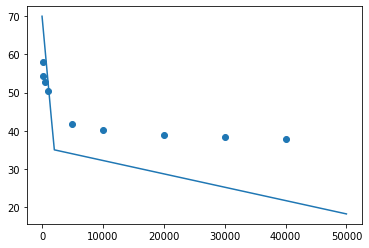

In [104]:
# plot
fig, ax = plt.subplots(1,1)
ax.scatter(x1,y1)

yguess= lambda x: fy(x,a,b,c,d,1e-8,xmax,xmin)
# gguess= lambda x: g(x,d,1e-8,xmax,xmin)
vx=np.linspace(0,50000,100)
xsc=np.linspace(0,50000,100)
plt.plot(vx,yguess(vx))
# plt.plot(x,gguess(x)*d)

# plt.xlim(0,100000)
# plt.ylim(0,b)

plt.show()


In [105]:
# objective function
def objF(v,xexp,yexp):
    a,b,c,d = v[0],v[1],v[2],v[3]
    F=0
    for (xexpi,yexpi) in zip(xexp,yexp):
        F += (yexpi-fy(xexpi,a,b,c,d,csi,xmax,xmin))**2
    return F
        
print(objF([a,b,c,d],x1,y1))

996.5973710341862


# minimization:
> https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html

-0.0072244889262099215 57.051021133091325 -0.00010621952149191875 2163.504931157737


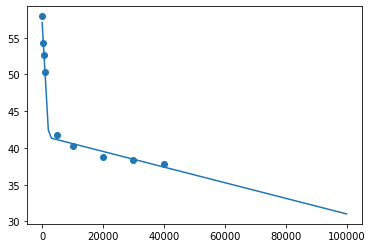

In [106]:
# minimization
from scipy import optimize as opt
ans = opt.minimize(fun= lambda v: objF(v,x1,y1), x0=np.array([a,b,c,d]), method='Nelder-Mead')
a,b,c,d = ans['x']
print(a,b,c,d)

# plot
fig, ax = plt.subplots(1,1)
ax.scatter(x1,y1)

yans= lambda x: fy(x,a,b,c,d,1e-8,xmax,xmin)
# gans= lambda x: g(x,d,1e-8,xmax,xmin)
vx=np.linspace(0,100000,100)
xsc=np.linspace(0,100000,100)
plt.plot(vx,yguess(vx))
# plt.plot(vx,gguess(x)*d)

# plt.xlim(0,100000)
# plt.ylim(0,b)

plt.show()
